<a href="https://colab.research.google.com/github/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/blob/main/Phase_2_Twitter_Sentiment_9_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Twitter Sentiment Analysis Climate Change**
By Charles Emeka Onyi & Lucía Morales Lizárraga 

Supervised by Nishtha Jain & Benjamin Feifke

 
Challenge and **data** adquired from: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?datasetId=413654

Our **GitHub Repository** where you can find the data set, our colabs and processes: https://github.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis



The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

- 2(News): the tweet links to factual news about climate change
- 1(Pro): the tweet supports the belief of man-made climate change
- 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1(Anti): the tweet does not believe in man-made climate change

# Outline: 
>1. Create a code that loads and processes the data

>2. Explore the dataset 

>3. Tweets preprosessing techniques 

> 4. Prediction Models: 

>> 4.1 Linear Regression

>> 4.2 Naive Bayes Classifier

>> 4.3 Random Forest Classifier 

>> 4.4 K Nearest Neighbors Classification 

> 5. Feature Engeneering Techniques 

>> 5.1 Classification

>> 5.2 Oversamplong


In [1]:
# this is a hack to allow displaying more than one result per notebook cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 1. Load and process the data 

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/main/twitter_sentiment_data.csv'
df = pd.read_csv(url)
df.head(5)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


# 2. Exploring the dataset

In [3]:
# Shape
df.shape

(43943, 3)

,sentiment
1,52.254056
2,21.109164
0,17.556835
-1,9.079944


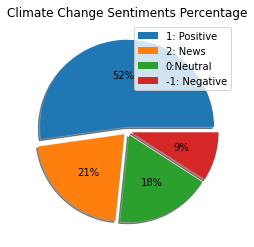

In [4]:
# Distribution 
sentiment_count =df['sentiment'].value_counts().to_frame()
percentage = (sentiment_count * 100) / df.shape[0]
percentage 

# Pie Chart with pandas 
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05)

labels = ['1: Positive', '2: News', '0:Neutral','-1: Negative']
percentage.plot(kind='pie', y='sentiment', labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, legend=True, 
                title='Climate Change Sentiments Percentage', ylabel= '', labeldistance=None)

In [5]:
df.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


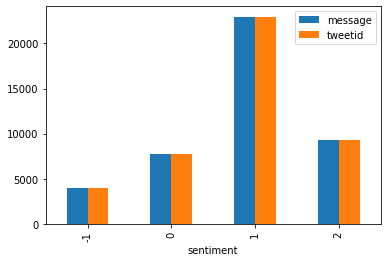

In [6]:
df.groupby('sentiment').count().plot(kind='bar')

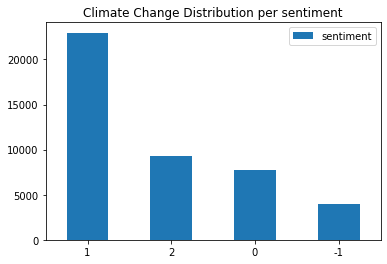

In [7]:
from matplotlib import pyplot as plt
plot= df['sentiment'].value_counts().plot(kind='bar', rot=0, legend=True, title='Climate Change Distribution per sentiment', ylabel= '')

In [8]:
# Check whether there is NAs 
df.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

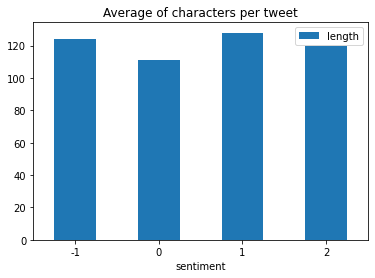

In [9]:
# Tweets Length

df['length'] = df['message'].str.len()

df.groupby(['sentiment'])['length'].mean().round(0).plot(kind='bar', rot=0, legend=True, title='Average of characters per tweet', ylabel= '')

Text(0.5, 1.0, 'Tweet length for each class')

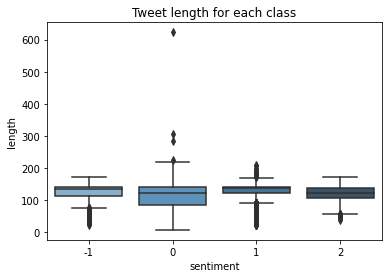

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

In [11]:
percent_duplicates = round((1-(df['message'].nunique()/len(df['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')

Duplicated tweets in train data:
6.62 %


Hastags

In [12]:
import re
import nltk

def hashtag_extract(tweet):
  hashtags = []
  for i in tweet:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
        
  hashtags = sum(hashtags, [])
  frequency = nltk.FreqDist(hashtags)
    
  hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
  hashtag_df = hashtag_df.nlargest(15, columns="count")

  return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 1])
anti = hashtag_extract(df['message'][df['sentiment'] == -1])
neutral = hashtag_extract(df['message'][df['sentiment'] == 0])
news = hashtag_extract(df['message'][df['sentiment'] == 2])

pro.head(10)


,hashtag,count
2,climate,504
35,climatechange,272
0,BeforeTheFlood,233
70,ActOnClimate,143
20,ParisAgreement,105
34,ClimateChange,98
176,ImVotingBecause,93
21,COP22,85
22,auspol,69
49,COP21,62


In [13]:
anti.head(10)

,hashtag,count
2,tcot,55
44,MAGA,25
9,climate,23
19,Trump,19
22,climatechange,19
6,p2,13
50,GlobalWarming,10
226,WakeUpAmerica,10
4,pjnet,9
60,FakeNews,9


Word Clouds

In [14]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [15]:
# We temporaly manually set the list because we got an error with the nltk stopword package. 
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# 3. Preprocessing the data  

In [16]:
!pip install better_profanity # Install it if needed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.3 MB/s 


In [17]:
# Convert the column 'message' in a list 

message_list = df.message.to_list()


21/09/22
Source: https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py 



In [18]:
!pip install requests # If necessary 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
""" Copyright 2017, Dimitrios Effrosynidis, All rights reserved. """
# Functions for preprocessing data

import re
from functools import partial
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# For reading the slang document 
import urllib.request
import requests
import urllib
from urllib.request import urlopen
import urllib3

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

#""" Creates a dictionary with slangs and their equivalents and replaces them """
#slang_url ='https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt'
#for line in urllib.request.urlopen(slang_url):
#    slang_txt = (line.decode('utf-8')) 

#with open(slang_txt) as file:
#    slang_map = dict(map(str.strip, line.partition('\t')[::2])
#    for line in file if line.strip())

#slang_words = sorted(slang_map, key=len, reverse=True) # longest first for regex
#regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
#replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

#def countSlang(text):
#    """ Input: a text, Output: how many slang words and a list of found slangs """
#    slangCounter = 0
#    slangsFound = []
#    tokens = nltk.word_tokenize(text)
#    for word in tokens:
#        if word in slang_words:
#            slangsFound.append(word)
#            slangCounter += 1
#    return slangCounter, slangsFound

""" Replaces contractions from a string to their equivalents """
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))


### Spell Correction begin ###
""" Spell Correction http://norvig.com/spell-correct.html """
def words(text): return re.findall(r'\w+', text.lower())

#WORDS = Counter(words(open('corporaForSpellCorrection.txt').read()))

#def P(word, N=sum(WORDS.values())): 
#    """P robability of `word`. """
#    return WORDS[word] / N

def spellCorrection(word): 
    """ Most probable spelling correction for word. """
    return max(candidates(word), key=P)

def candidates(word): 
    """ Generate possible spelling corrections for word. """
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    """ The subset of `words` that appear in the dictionary of WORDS. """
    return set(w for w in words if w in WORDS)

def edits1(word):
    """ All edits that are one edit away from `word`. """
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    """ All edits that are two edits away from `word`. """
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

### Spell Correction End ###

### Replace Negations Begin ###

def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
      for lemma in syn.lemmas():
        for antonym in lemma.antonyms():
          antonyms.add(antonym.name())
    if len(antonyms) == 1:
      return antonyms.pop()
    else:
      return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
      word = text[i]
      if word == 'not' and i+1 < l:
        ant = replace(text[i+1])
        if ant:
          words.append(ant)
          i += 2
          continue
      words.append(word)
      i += 1
    return words

### Replace Negations End ###

def addNotTag(text):
	""" Finds "not,never,no" and adds the tag NEG_ to all words that follow until the next punctuation """
	transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
       lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), 
       text,
       flags=re.IGNORECASE)
	return transformed

def addCapTag(word):
    """ Finds a word with at least 3 characters capitalized and adds the tag ALL_CAPS_ """
    if(len(re.findall("[A-Z]{3,}", word))):
        word = word.replace('\\', '' )
        transformed = re.sub("[A-Z]{3,}", "ALL_CAPS_"+word, word)
        return transformed
    else:
        return word

' Copyright 2017, Dimitrios Effrosynidis, All rights reserved. '

' Replaces contractions from a string to their equivalents '

' Spell Correction http://norvig.com/spell-correct.html '

In [20]:
# Preprocessing our data set: 

# 1. Remove Unicode
cleaned_list_1 = []
for tweet in message_list: 
  string = removeUnicode(tweet)
  cleaned_list_1.append(string)

# 2. .Replace URL
cleaned_list_2 = []
for tweet in cleaned_list_1: 
  string = replaceURL(tweet)
  cleaned_list_2.append(string)

# 3. Replace @User
cleaned_list_3 = []
for tweet in cleaned_list_2: 
  string = replaceAtUser(tweet)
  cleaned_list_3.append(string)

# 4. Remove # in front of words 
cleaned_list_4 = []
for tweet in cleaned_list_3: 
  string = removeHashtagInFrontOfWord(tweet)
  cleaned_list_4.append(string)

# 5. Remove numbers
cleaned_list_5 = []
for tweet in cleaned_list_4: 
  string = removeNumbers(tweet)
  cleaned_list_5.append(string)

# 6. Replace multi exclamation marks 
cleaned_list_6 = []
for tweet in cleaned_list_5: 
  string = replaceMultiExclamationMark(tweet)
  cleaned_list_6.append(string)

# 7. Replace Multi Question Mark
cleaned_list_7 = []
for tweet in cleaned_list_6: 
  string = replaceMultiQuestionMark(tweet)
  cleaned_list_7.append(string)

# 8. Replace multistop Mark
cleaned_list_8 = []
for tweet in cleaned_list_7: 
  string = replaceMultiStopMark(tweet)
  cleaned_list_8.append(string)

# 9. Deal with slang
cleaned_list_9 = []
for tweet in cleaned_list_8: 
  string = replaceContraction(tweet)
  cleaned_list_9.append(string)

# We Skiped replaceElongated(word) It doesn't work on our data set.

# 10. Remove emoticons 
cleaned_list_10 = []
for tweet in cleaned_list_9: 
  string = removeEmoticons(tweet)
  cleaned_list_10.append(string)

# 11. Replace negations

#cleaned_list_11 = [] 

#Doesn't work 
#for tweet in cleaned_list_10: 
#  string = replaceNegations(tweet)
#  cleaned_list_11.append(string)

In [21]:
# View the first elements of the list. 
cleaned_list_10[0:1]


['atUser climate change is an interesting hustle as it was global warming but the planet stopped warming for  yes while the suv boom']

3.2: Join the list in a new df with the sentiments column

In [22]:
# Join list in a new df with the sentiments. 
# We need to join: 'df.sentiment' & 'cleaned_list_10'

df2 = pd.DataFrame(list(zip(df.sentiment, cleaned_list_10)),
                   columns = ['sentiment', 'message'])
df2.head(10)

,sentiment,message
0,-1,atUser climate change is an interesting hustle...
1,1,"RT atUser Watch BeforeTheFlood right here, as ..."
2,1,Fabulous! Leonardo DiCaprio is film on climate...
3,1,RT atUser Just watched this amazing documentar...
4,2,"RT atUser Pranita Biswasi, a Lutheran from Odi..."
5,0,Unamshow awache kujinga na iko global warming url
6,2,"RT atUser Pranita Biswasi, a Lutheran from Odi..."
7,2,RT atUser Presidential Candidate DonaldTrump i...
8,0,RT atUser Leonardo DiCaprio is climate change ...
9,1,BeforeTheFlood Watch BeforeTheFlood right here...


#  **4. Feature Engineering Techniques for Machine Learning**

Distribution 2

- Drop (2) News and (0) Neutral 



In [23]:
#df_n_p = df2.drop(df2[df2['sentiment'] == 0].index, inplace = True)
#df_n_p = df2.drop(df2[df2['sentiment'] == 2].index, inplace = True) # We need to clean it further in one line 

#print(df_n_p)

#df_n_p.groupby('sentiment').count().plot(kind='bar', rot=0, legend=True, title='Just Positive and negative Sample Distribution', ylabel= '')

#df_n_p.groupby('sentiment').count()


# Oversampling 2 
Just with negative and positive values 





AxesSubplot(0.125,0.125;0.775x0.755)


-1    36548
 1    22962
Name: sentiment, dtype: int64

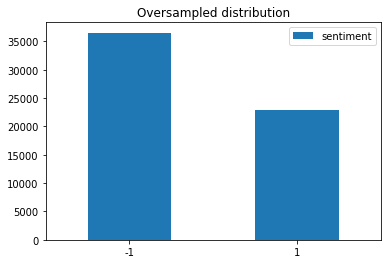

In [24]:
# From: https://michael-fuchs-python.netlify.app/2020/01/16/dealing-with-imbalanced-classes/
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

## conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE

#For undersampling
#from imblearn.under_sampling import NearMiss


# Separate majority and minority classes

#df_majority_n_p = df_n_p[df_n_p.sentiment==1]
df_majority_n_p = df2[df2.sentiment ==1]
df_minority_n_p = df2[df2.sentiment==-1]
 
# Upsample minority class
df_minority_upsampled_n_p = resample(df_minority_n_p, 
                                 replace=True,      # sample with replacement
                                 n_samples=36548)   # to match majority class
                              
 
#Combine majority class with upsampled minority class
df_upsampled_n_p = pd.concat([df_majority_n_p, df_minority_upsampled_n_p])


#df_upsampled.head(10)
print(df_upsampled_n_p['sentiment'].value_counts().plot(kind='bar', rot=0, legend=True, title='Oversampled distribution', ylabel= ''))
df_upsampled_n_p['sentiment'].value_counts()



# **5. Classification Models**


## 5.1 Linear Regression

Vectorize & split into test and train
Split the data frame into  train and test sets .80% of the data will be used for training, and 20% will be used for testing. 

Taken from: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

Linear Regression 4 With just negative and positive 

In [25]:
# Split 3 
# Random split train and test data. 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pickle

X_train, X_test, y_train, y_test = train_test_split(df_upsampled_n_p['message'], df_upsampled_n_p['sentiment'], test_size=0.33, random_state=42)

# count vectorizer 3:

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500) # Here we increased the max_iter to converge.

# Fit
# Try to optimize it 
lr.fit(train_matrix,y_train)

# Prediction
predictions = lr.predict(test_matrix)

# To test the accuracy of the model: 
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

# The results should be a confusion matrix

print(classification_report(predictions,y_test))


LogisticRegression(max_iter=500)

array([[11902,   918],
       [  142,  6677]])

              precision    recall  f1-score   support

          -1       0.99      0.93      0.96     12820
           1       0.88      0.98      0.93      6819

    accuracy                           0.95     19639
   macro avg       0.93      0.95      0.94     19639
weighted avg       0.95      0.95      0.95     19639



In [26]:
with open('trained_lr.0.1.0.3.pkl', 'wb') as f:
  pickle.dump(lr,f)

## Building the FastAPI App

In [27]:
#pip install fastapi 

In [28]:
#pip install colabcode

In [29]:
import joblib
import re
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from fastapi import FastAPI
from colabcode import ColabCode

ModuleNotFoundError: ignored

In [ ]:
# Initialize FastAPI 

app = FastAPI()

In [ ]:
cc = ColabCode(port=12000, code=False)

In [ ]:
# Defying simple get request 

@app.get('/')
def get_root():
  return {'message': 'Hellooooooo is this working? '}


In [ ]:
cc.run_app(app=app)

In [ ]:
%%writefile models.py
from pydantic import BaseModel, conlist
from typing import List


class lr(BaseModel):
    data: List[conlist(float, min_items=4, max_items=4)]

# **References** -- 

- Effrosyinidis, Dimittrios (2019): 16 Text Preprocessing Techniques in Python for Twitter Sentiment Analysis. Available online https://github.com/Deffro/text-preprocessing-techniques, Last update: 16/04/2019, Última comprobación el 17/10/2022.


- Effrosyinidis, Dimittrios; Symeonidis, Symeon; Arampatzis, Avi (2017): A Comparison of Pre-processing Techniques for Twitter Sentiment Analysis. En: Research and Advanced Technology for Digital Libraries. TPDL 2017. Lecture Notes in Computer Science vol 10450. Available online https://doi.org/10.1007/978-3-319-67008-9_31.

- Meinie, Nicole (2020): Sentiment analysis: Twitter on climate change. Available online: https://www.kaggle.com/code/nicolemeinie/sentiment-analysis-twitter-on-climate-change/notebook, Last seen: 17/10/2022.

- Quian, Edward (2018):
Twitter Cimate Change Sentiment Dataset.
Available online: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?datasetId=413654, Last seen: 17/10/2022.

- Selvaraj, Natasha (2020): A Beginner's Guide to Sentiment Analysis with Python. Puublished in Towards Data Science. Available online: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6, Last update: 12/09/2020, Last seen: 17/10/2022.